Курсовая работа "Предварительный анализ данных и построение признаков в задачах кредитного скоринга"
Ущаповский Никита Андреевич, группа ЗБ-ПИ19-1, Финансовый Университет при Правительстве РФ

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pylab import rcParams
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
file = 'application_record.csv'
file1 = 'credit_record.csv'
application = pd.read_csv(file)
credit = pd.read_csv(file1)
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


Для удобства восприятия, одновременно переименуем столбцы и, соответсвенно, объясним, какой столбец за что отвечает.

In [3]:
application.rename(columns={'CODE_GENDER':'Пол','FLAG_OWN_CAR':'Наличие авто','FLAG_OWN_REALTY':'Жилье',
                         'CNT_CHILDREN':'Дети','AMT_INCOME_TOTAL':'Доход в год',
                         'NAME_EDUCATION_TYPE':'Образование','NAME_FAMILY_STATUS':'Семейное положение',
                        'NAME_HOUSING_TYPE':'Тип жилья','FLAG_EMAIL':'Наличие email',
                         'NAME_INCOME_TYPE':'Категория дохода','FLAG_WORK_PHONE':'Наличие раб. телефона',
                         'FLAG_PHONE':'Наличие телефона','CNT_FAM_MEMBERS':'Численность семьи',
                        'OCCUPATION_TYPE':'Вид деятельности','FLAG_MOBIL':'Наличие мобильного',
                            'DAYS_EMPLOYED':'Дней труд. деят-ти','DAYS_BIRTH':'Дней с рождения'
                        },inplace=True)
application

,ID,Пол,Наличие авто,Жилье,Дети,Доход в год,Категория дохода,Образование,Семейное положение,Тип жилья,Дней с рождения,Дней труд. деят-ти,Наличие мобильного,Наличие раб. телефона,Наличие телефона,Наличие email,Вид деятельности,Численность семьи
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


Необходимо пояснить, что в данной структуре данных, срок открытия счета отрицательный, что показывает дату открытия счета относительно настоящего месяца. Также касаемо статуса клиента, тут несколько переменных, где 
0: просрочка на 1-29 дней 
1: просрочка на 30-59 дней 
2: просрочка на 60-89 дней 
3: просрочка на 90-119 дней 
4: просрочка на 120-149 дней 
5: Просроченные или безнадежные долги, списания более чем на 150 дней 
C: погашены в этом месяце 
X: За месяц кредита нет

In [4]:
credit.rename(columns={'MONTHS_BALANCE':'Срок открытия счета','STATUS':'Статус клиента'
                        },inplace=True)
credit

,ID,Срок открытия счета,Статус клиента
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
application.describe(include="all")

,ID,Пол,Наличие авто,Жилье,Дети,Доход в год,Категория дохода,Образование,Семейное положение,Тип жилья,Дней с рождения,Дней труд. деят-ти,Наличие мобильного,Наличие раб. телефона,Наличие телефона,Наличие email,Вид деятельности,Численность семьи
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


В данном описательном анализе видим, что в целом данные соответствуют ожидаемым, за исключение столбца с днями трудовой деятельности. Максимальное значение в 365 243 и среднее 60 563 явно противоречат здравому смыслу, однако в описании датасета сказано, что если значение положительно, то это означает что клиент безработный. Вернемся к этому вопросу позднее. 
Также видим, что что наличие мобильного телефона присуще всем клиентам, поэтому можем безболезненно удалить этот признак.

In [6]:
application.drop('Наличие мобильного', axis=1, inplace=True)

Займемся поиском пропущенных значений

In [7]:
application.isna().sum() 

ID                            0
Пол                           0
Наличие авто                  0
Жилье                         0
Дети                          0
Доход в год                   0
Категория дохода              0
Образование                   0
Семейное положение            0
Тип жилья                     0
Дней с рождения               0
Дней труд. деят-ти            0
Наличие раб. телефона         0
Наличие телефона              0
Наличие email                 0
Вид деятельности         134203
Численность семьи             0
dtype: int64

In [8]:
credit.isna().sum()

ID                     0
Срок открытия счета    0
Статус клиента         0
dtype: int64

Видим, что пропущенные значения присутствуют лишь в видах деятельности. Заменим их на "другое".

In [9]:
application['Вид деятельности'].fillna(value='Other', inplace=True)

Добавим целевой столбец "Риск" , с той идеей, что рискованным заемщиком будет признаваться клиент, просрочивший платеж на 30 и более дней. Также создадим общую таблицу data.

In [10]:

credit['Риск']=credit['Статус клиента']
credit['Риск'].replace('X', 0, inplace=True)
credit['Риск'].replace('C', 0, inplace=True)
credit['Риск']=credit['Риск'].astype(int)
credit.loc[credit['Риск']>=1,'Риск']=1
target_df=pd.DataFrame(credit.groupby(['ID'])['Риск'].agg(max)).reset_index()
data=pd.merge(application, target_df, how='inner', on=['ID'])
data

,ID,Пол,Наличие авто,Жилье,Дети,Доход в год,Категория дохода,Образование,Семейное положение,Тип жилья,Дней с рождения,Дней труд. деят-ти,Наличие раб. телефона,Наличие телефона,Наличие email,Вид деятельности,Численность семьи,Риск
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,0,0,0,Managers,2.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,0,0,0,Sales staff,2.0,1


Также из датафрейма credit добавим столбец Срок открытия, показывающий сколько месяцев открыт счет

In [11]:
start_df=pd.DataFrame(credit.groupby(['ID'])['Срок открытия счета'].agg(min)).reset_index()
start_df.rename(columns={'Срок открытия счета':'Срок открытия'}, inplace=True)
start_df['Срок открытия']=-start_df['Срок открытия']
data=pd.merge(data, start_df, how='inner', on=['ID'])
data

,ID,Пол,Наличие авто,Жилье,Дети,Доход в год,Категория дохода,Образование,Семейное положение,Тип жилья,Дней с рождения,Дней труд. деят-ти,Наличие раб. телефона,Наличие телефона,Наличие email,Вид деятельности,Численность семьи,Риск,Срок открытия
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,0,0,0,Managers,2.0,1,11
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1,23
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1,32
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,0,0,0,Sales staff,2.0,1,9


Преобразуем бинарные признаки в int.

In [12]:
data["Пол"] =  data["Пол"].replace(['F','M'],[0,1])
data["Наличие авто"] = data["Наличие авто"].replace(["Y","N"],[1,0])
data["Жилье"] = data["Жилье"].replace(["Y","N"],[1,0])
data


,ID,Пол,Наличие авто,Жилье,Дети,Доход в год,Категория дохода,Образование,Семейное положение,Тип жилья,Дней с рождения,Дней труд. деят-ти,Наличие раб. телефона,Наличие телефона,Наличие email,Вид деятельности,Численность семьи,Риск,Срок открытия
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1,15
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1,14
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,29
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,4
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,0,0,0,Managers,2.0,1,11
36453,5149834,0,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1,23
36454,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1,32
36455,5150049,0,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,0,0,0,Sales staff,2.0,1,9


Создадим столбцы с возрастом клиента, фактором безработности и временем трудового стажа.

In [13]:

data['Возраст']=-data['Дней с рождения']/365.2425
data.drop('Дней с рождения', axis=1, inplace=True)

data['Трудовой стаж']=-data['Дней труд. деят-ти']/365.2425
data.loc[data['Трудовой стаж']<0,'Трудовой стаж']=0
data.drop('Дней труд. деят-ти', axis=1, inplace=True)
data.drop('ID', axis=1, inplace=True)

In [14]:
data

,Пол,Наличие авто,Жилье,Дети,Доход в год,Категория дохода,Образование,Семейное положение,Тип жилья,Наличие раб. телефона,Наличие телефона,Наличие email,Вид деятельности,Численность семьи,Риск,Срок открытия,Возраст,Трудовой стаж
0,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,32.868574,12.435574
1,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,14,32.868574,12.435574
2,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,58.793815,3.104787
3,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.321403,8.353354
4,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,26,52.321403,8.353354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Managers,2.0,1,11,47.497211,6.625735
36453,0,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,23,33.914454,3.627727
36454,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,32,33.914454,3.627727
36455,0,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Sales staff,2.0,1,9,49.167334,1.793329


Посмотрим, есть ли в наборе данных повторяющиеся значения, и удалим их.

In [15]:
print(f'Duplicates in application df: {data.iloc[:,1:].duplicated().sum()}, ({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)')
data=data.drop_duplicates(subset=data.columns[1:], keep='first')

Duplicates in application df: 3865, (10.6%)


Вспомним проблему с столбцом "Дней труд деят-ти " и рассмотрим построееный на его основе признак "трудовой стаж"

In [16]:
data['Трудовой стаж'].describe()

count    32592.000000
mean         6.006175
std          6.482763
min          0.000000
25%          1.099954
50%          4.213639
75%          8.605242
max         43.020733
Name: Трудовой стаж, dtype: float64

<Axes: >

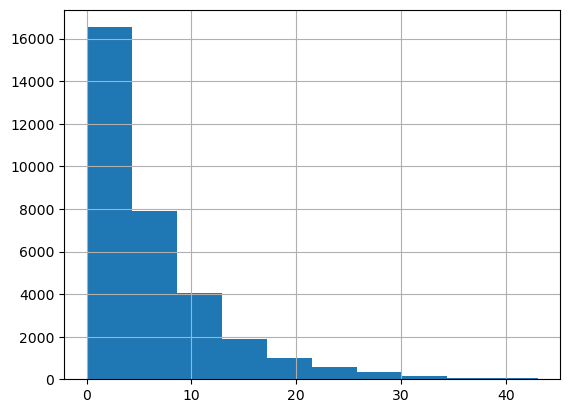

In [17]:
data['Трудовой стаж'].hist()

Видим, что теперь в признаке нет аномальных значений. 
Перед тем, как определять корреляцию признака и целевой переменной, стоит обратить внимание на то, что наш набор данных несбалансирован:


In [18]:
print((data['Риск']==1).sum())
print((data['Риск']==0).sum())

4078
28514


Вернемся к этому чуть позже.
Теперь посмотрим на тип данных в нашем датафрейме

In [19]:
data.dtypes

Пол                        int64
Наличие авто               int64
Жилье                      int64
Дети                       int64
Доход в год              float64
Категория дохода          object
Образование               object
Семейное положение        object
Тип жилья                 object
Наличие раб. телефона      int64
Наличие телефона           int64
Наличие email              int64
Вид деятельности          object
Численность семьи        float64
Риск                       int32
Срок открытия              int64
Возраст                  float64
Трудовой стаж            float64
dtype: object

Преобразуем категориальные признаки в числовые.

In [20]:
data = pd.get_dummies(data, prefix_sep=':', drop_first=True)
data.head()

,Пол,Наличие авто,Жилье,Дети,Доход в год,Наличие раб. телефона,Наличие телефона,Наличие email,Численность семьи,Риск,...,Вид деятельности:Low-skill Laborers,Вид деятельности:Managers,Вид деятельности:Medicine staff,Вид деятельности:Other,Вид деятельности:Private service staff,Вид деятельности:Realty agents,Вид деятельности:Sales staff,Вид деятельности:Secretaries,Вид деятельности:Security staff,Вид деятельности:Waiters/barmen staff
0,1,1,1,0,427500.0,1,0,0,2.0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,427500.0,1,0,0,2.0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,0,112500.0,0,0,0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,270000.0,0,1,1,1.0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,270000.0,0,1,1,1.0,0,...,0,0,0,0,0,0,1,0,0,0


Возвращаясь к несбалансированности, проведем перебалансировку данных, пересемплируем данные с рискованными клиентами

In [21]:
Y = data['Риск']
X = data
sm = SMOTE(random_state=42)

smData, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {smData.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (32592, 48)
Shape of X after SMOTE: (57028, 48)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Риск, dtype: float64

Построим несколько графиков, иллюстрирующих зависимость признака и рискованности клиента

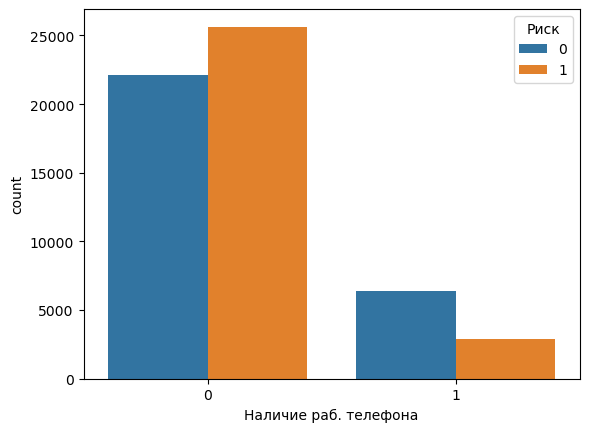

In [22]:
sns.countplot(x='Наличие раб. телефона',hue='Риск',data=smData)
rcParams['figure.figsize'] = 25, 10

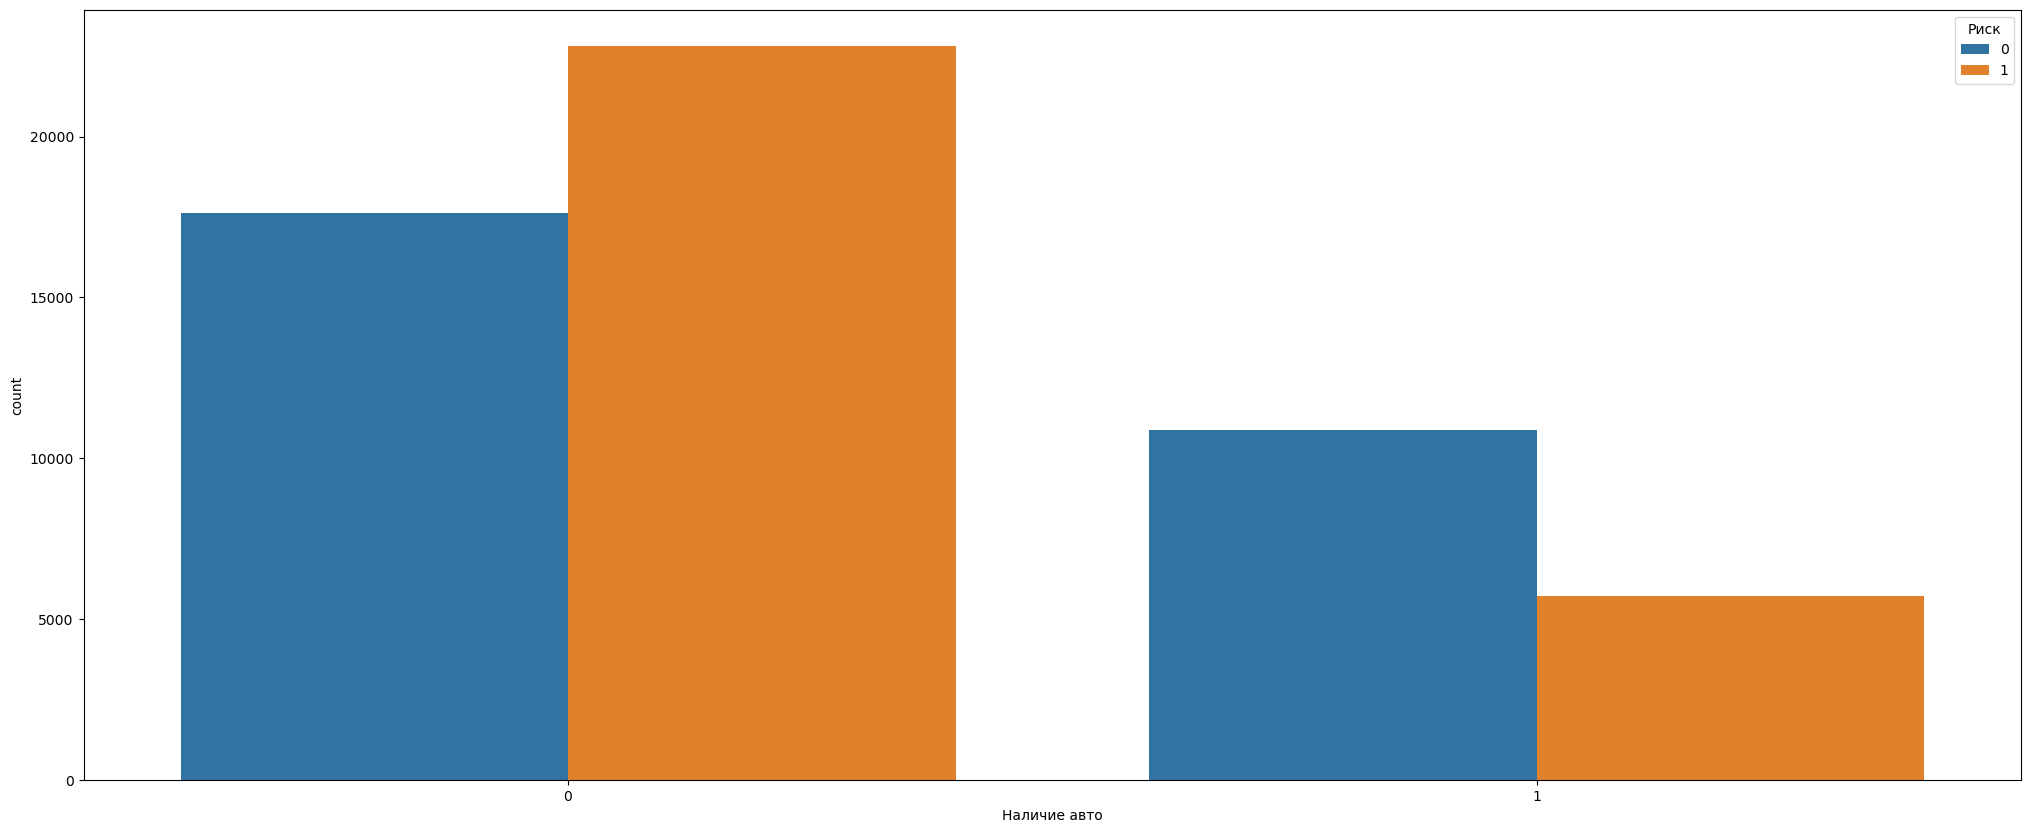

In [23]:
sns.countplot(x='Наличие авто',hue='Риск',data=smData)
rcParams['figure.figsize'] = 25, 10

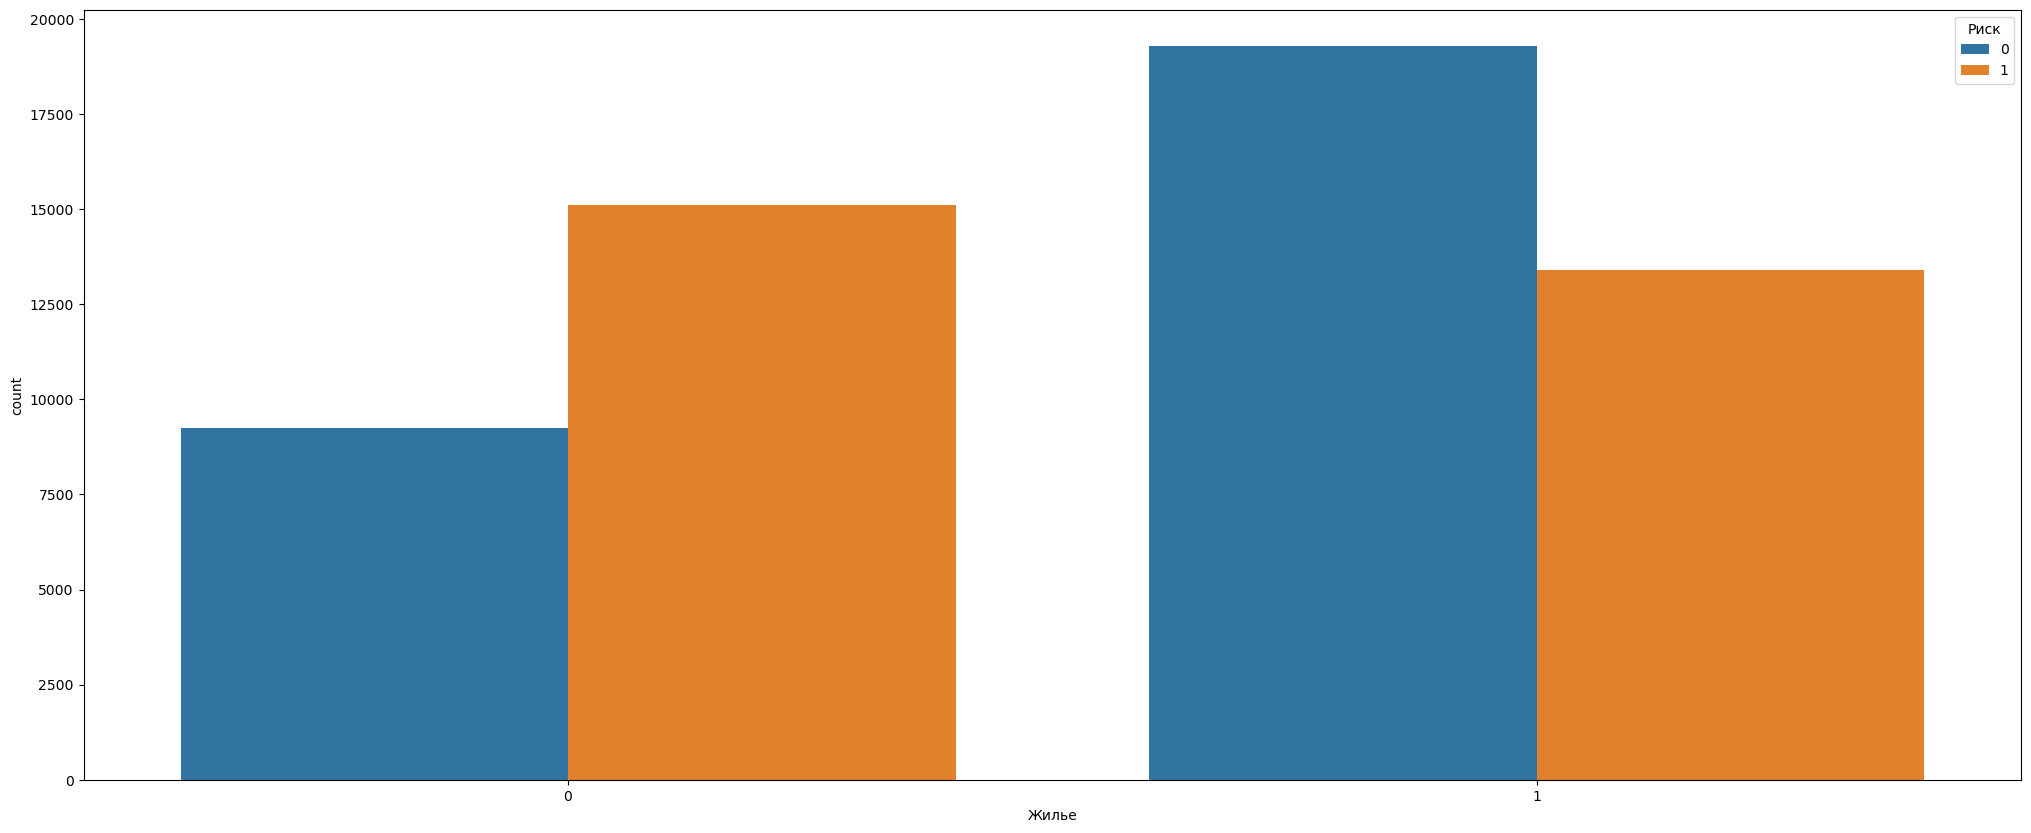

In [24]:
sns.countplot(x='Жилье',hue='Риск',data=smData)
rcParams['figure.figsize'] = 25, 10

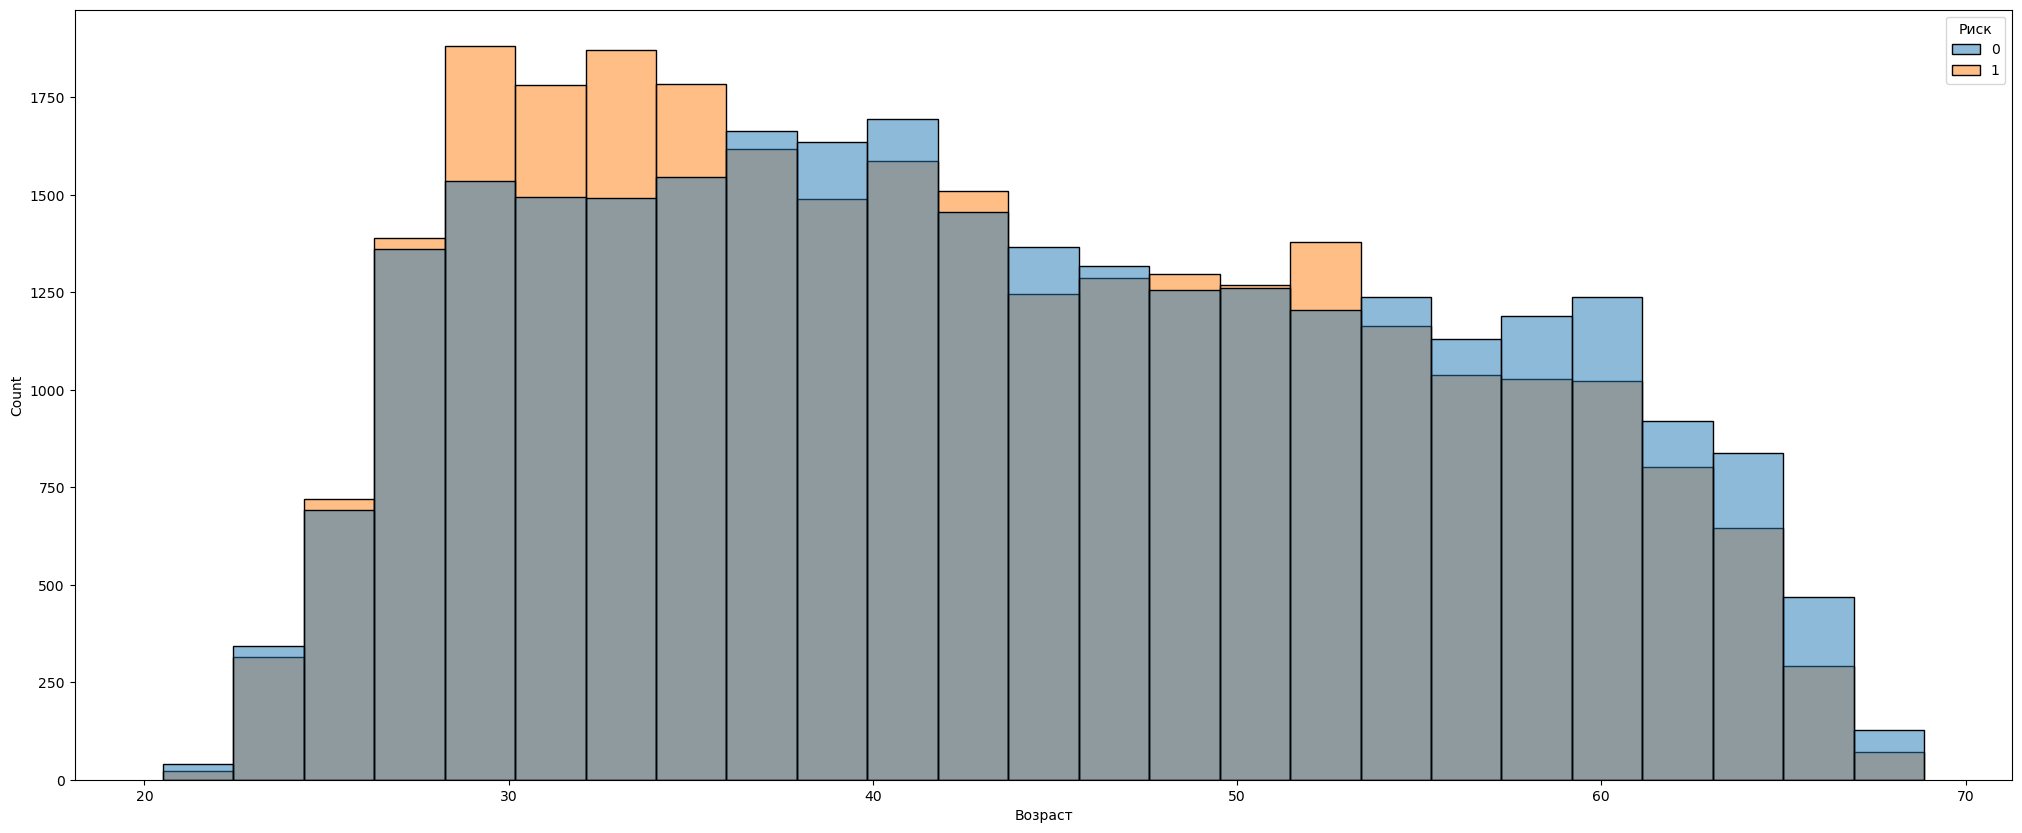

In [25]:
sns.histplot(x = 'Возраст', hue = 'Риск', data = smData, bins = 25);

Разделим данные на обучающую и тестовую выборки

In [34]:
Y = smData['Риск']
X = smData.drop(['Риск'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, 
                                                 test_size=0.3,
                                                    random_state = 42)

Для упрощения тестирования моделей используем pycaret

In [35]:
from pycaret.regression import *
from pycaret.classification import *
reg_experiment = setup(smData, 
                       target = 'Риск', 
                       session_id=1, 
                       experiment_name='Кредитный скоринг',
                       normalize = True, 
                       transformation = True, 
                       remove_multicollinearity = True,
                       multicollinearity_threshold = 0.5
                           )

,Description,Value
0,Session id,1
1,Target,Риск
2,Target type,Binary
3,Original data shape,"(57028, 48)"
4,Transformed data shape,"(57028, 45)"
5,Transformed train set shape,"(39919, 45)"
6,Transformed test set shape,"(17109, 45)"
7,Numeric features,47
8,Preprocess,True
9,Imputation type,simple


In [36]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9096,0.9574,0.8961,0.9209,0.9083,0.8191,0.8194,0.5260
et,Extra Trees Classifier,0.9027,0.9396,0.8957,0.9084,0.9020,0.8054,0.8055,0.6700
knn,K Neighbors Classifier,0.8717,0.9302,0.8665,0.8756,0.8710,0.7433,0.7434,0.6640
lightgbm,Light Gradient Boosting Machine,0.8706,0.9329,0.7878,0.9440,0.8589,0.7411,0.7515,0.4040
dt,Decision Tree Classifier,0.8667,0.8685,0.8750,0.8607,0.8678,0.7334,0.7335,0.4140
gbc,Gradient Boosting Classifier,0.8323,0.8960,0.7394,0.9082,0.8151,0.6646,0.6764,0.4080
lda,Linear Discriminant Analysis,0.8027,0.8596,0.7271,0.8565,0.7865,0.6053,0.6124,0.3870
ridge,Ridge Classifier,0.8026,0.0000,0.7271,0.8565,0.7865,0.6052,0.6123,0.3850
ada,Ada Boost Classifier,0.8026,0.8718,0.7550,0.8345,0.7927,0.6053,0.6081,0.4190
lr,Logistic Regression,0.7996,0.8605,0.7271,0.8504,0.7839,0.5992,0.6056,0.4030


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

При сравнении моделей видим, что наиболее точный результат показывает модель случайного леса решений. Будем рассматривать ее в качестве единственной.

In [37]:
rfclf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9083,0.9574,0.8908,0.9232,0.9067,0.8166,0.8171
1,0.9108,0.9565,0.8983,0.9214,0.9097,0.8216,0.8219
2,0.9088,0.9576,0.8953,0.9202,0.9076,0.8176,0.8179
3,0.9096,0.9576,0.8928,0.9238,0.9080,0.8191,0.8196
4,0.9106,0.9562,0.8933,0.9253,0.9090,0.8211,0.8216
5,0.9106,0.9619,0.9008,0.9188,0.9097,0.8211,0.8213
6,0.9063,0.9560,0.8973,0.9138,0.9055,0.8126,0.8128
7,0.9083,0.9565,0.8918,0.9223,0.9068,0.8166,0.8171
8,0.9051,0.9525,0.8943,0.9140,0.9040,0.8101,0.8103


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Видим, что средняя точность превышает 90%, что говорит о жизнеспособности модели. Также AUC метрика в среднем 95%, и это говорит о том, что наша модель получилась довольно удачной.

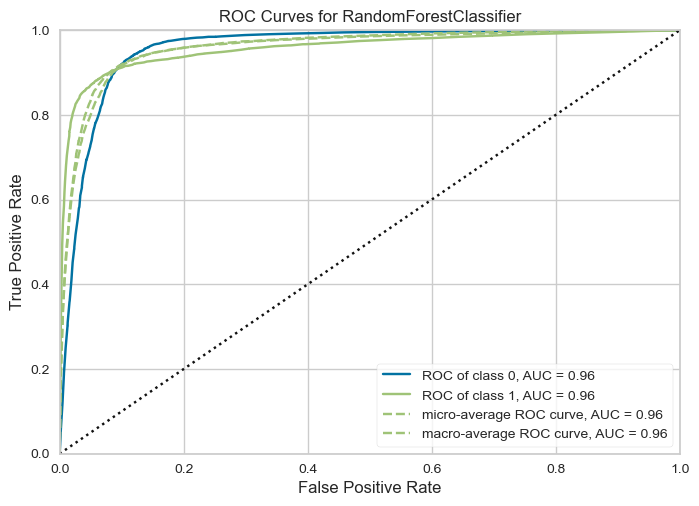

In [38]:
plot_model(rfclf)

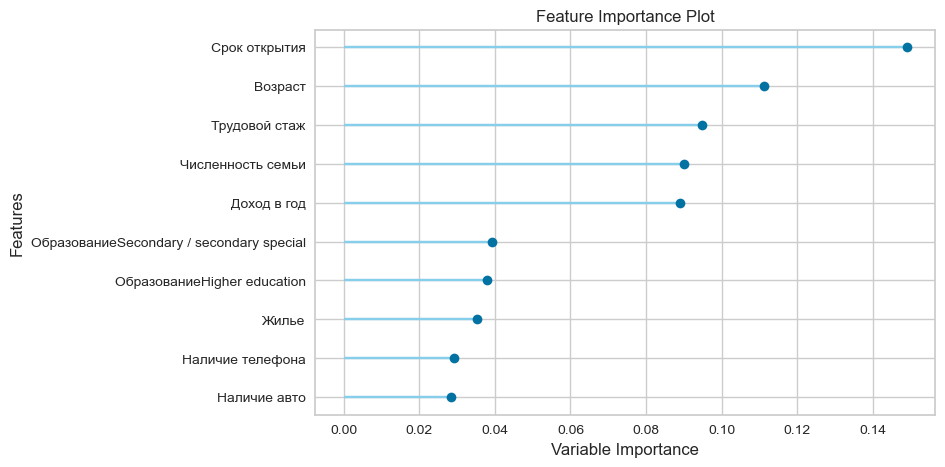

In [39]:
plot_model(rfclf, plot = 'feature')

Исходя из графика, можем сделать вывод, что наиболее важными признаками стали те, которые мы построили самостоятельно. Так как это несколько подозрительно, попробуем нормализовать данные с помощью minmaxscaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

names = smData.columns
d = scaler.fit_transform(smData)

scaled_data = pd.DataFrame(d, columns=names)
scaled_data.head()

,Пол,Наличие авто,Жилье,Дети,Доход в год,Наличие раб. телефона,Наличие телефона,Наличие email,Численность семьи,Риск,...,Вид деятельности:Low-skill Laborers,Вид деятельности:Managers,Вид деятельности:Medicine staff,Вид деятельности:Other,Вид деятельности:Private service staff,Вид деятельности:Realty agents,Вид деятельности:Sales staff,Вид деятельности:Secretaries,Вид деятельности:Security staff,Вид деятельности:Waiters/barmen staff
0,1.0,1.0,1.0,0.0,0.258721,1.0,0.0,0.0,0.052632,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.258721,1.0,0.0,0.0,0.052632,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.055233,0.0,0.0,0.0,0.052632,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.156977,0.0,1.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.156977,0.0,1.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
from pycaret.regression import *
from pycaret.classification import *
reg_experiment = setup(scaled_data, 
                       target = 'Риск', 
                       session_id=2, 
                       experiment_name='Кредитный скоринг minMax',
                       normalize = True, 
                       transformation = True, 
                       remove_multicollinearity = True,
                       multicollinearity_threshold = 0.5
                           )

,Description,Value
0,Session id,2
1,Target,Риск
2,Target type,Binary
3,Original data shape,"(57028, 48)"
4,Transformed data shape,"(57028, 45)"
5,Transformed train set shape,"(39919, 45)"
6,Transformed test set shape,"(17109, 45)"
7,Numeric features,47
8,Preprocess,True
9,Imputation type,simple


In [30]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9078,0.9566,0.8951,0.9185,0.9066,0.8157,0.8160,1.5520
et,Extra Trees Classifier,0.9020,0.9384,0.8964,0.9066,0.9015,0.8040,0.8041,2.1540
lightgbm,Light Gradient Boosting Machine,0.8695,0.9337,0.7856,0.9441,0.8576,0.7391,0.7498,0.7050
knn,K Neighbors Classifier,0.8691,0.9280,0.8635,0.8734,0.8684,0.7383,0.7384,0.6710
dt,Decision Tree Classifier,0.8690,0.8706,0.8758,0.8642,0.8699,0.7381,0.7382,0.4820
gbc,Gradient Boosting Classifier,0.8334,0.8966,0.7398,0.9103,0.8162,0.6668,0.6789,1.6560
ada,Ada Boost Classifier,0.8076,0.8737,0.7641,0.8370,0.7988,0.6152,0.6176,0.7900
ridge,Ridge Classifier,0.8033,0.0000,0.7308,0.8548,0.7879,0.6065,0.6130,0.4350
lda,Linear Discriminant Analysis,0.8033,0.8606,0.7308,0.8548,0.7879,0.6065,0.6130,0.5570
lr,Logistic Regression,0.8013,0.8615,0.7306,0.8510,0.7861,0.6025,0.6087,1.3220


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [31]:
rfclfMMS = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9038,0.9515,0.8828,0.9215,0.9017,0.8076,0.8083
1,0.9148,0.9604,0.9013,0.9264,0.9137,0.8297,0.8300
2,0.9056,0.9592,0.8993,0.9107,0.9050,0.8111,0.8112
3,0.9018,0.9518,0.8908,0.9109,0.9007,0.8036,0.8038
4,0.9026,0.9531,0.8843,0.9178,0.9007,0.8051,0.8056
5,0.9106,0.9602,0.9023,0.9175,0.9098,0.8211,0.8213
6,0.9081,0.9554,0.8988,0.9158,0.9072,0.8161,0.8163
7,0.9078,0.9554,0.8873,0.9253,0.9059,0.8156,0.8163
8,0.9096,0.9596,0.8953,0.9216,0.9083,0.8191,0.8195


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

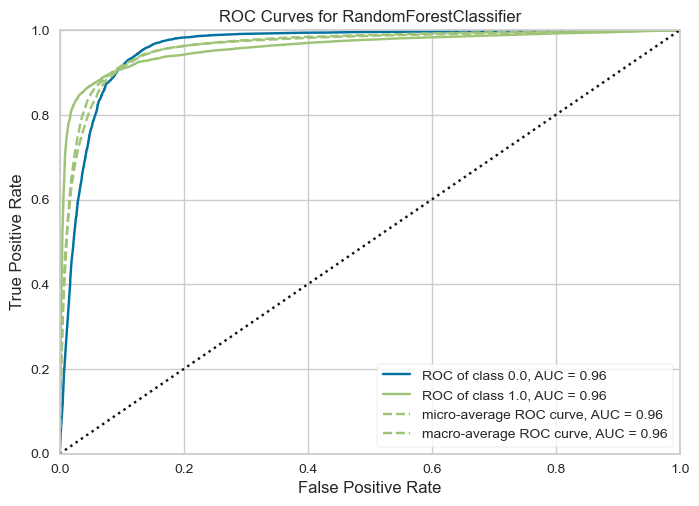

In [32]:
plot_model(rfclfMMS)

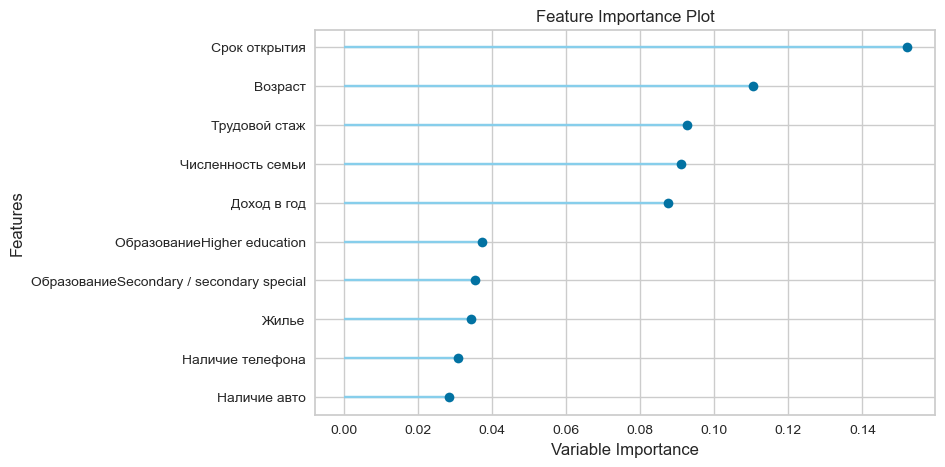

In [33]:
plot_model(rfclfMMS, plot = 'feature')

Видим, что никаких изменений не произошло. В целом, в полученных результатах нет противоречий, и их можно объяснить логично. 
Подводя вывод, могу отметить, что модель получилась достаточно точной в своих предсказаниях. В качестве дальнейшего улучшения можно рассматривать более точный алгоритм выявления неплатежеспособного клиента. Также дополнительными признаками однозначно могут стать некие глобальные метрики(безработица, ставка банковской системы и др.), характеризующие экономическую обстановку в мире, так как это также влияет и на потребителей кредитных продуктов. 
Возможно, важным признаком мог бы стать уровень доходов на члена семьи, но в условиях данного набора данных нет возможности это реализовать, так как тогда нужно учитывать доход и других членов семьи. 